In [2]:
import shift
import sys
import time
import pandas as pd
import numpy as np
import statistics
from scipy import stats
import matplotlib.pyplot as plt
import os
import math
import statsmodels.api as sm
import statsmodels
import statsmodels.tsa.stattools as ts

In [2]:
trader = shift.Trader("bkrupa")
trader.connect("initiator.cfg","buhz7JvL")

True

In [3]:
trader.subAllOrderBook()

True

In [66]:
def getSignal(df,n,delta):
    df['Pk'] = (df['BidPrice'] + df['AskPrice'])/2
    df['Mk'] = df['LastPrice'].rolling(n).max()
    df['mk'] = df['LastPrice'].rolling(n).min()
    df['Buy'] = np.where(df.Pk/df.Mk > (1 + delta), 1, 0)
    df['Sell'] = np.where(df.Pk/df.mk < (1 - delta), 1, 0)

In [67]:
def PandL(df):
    shares = 0
    PL = 0
    trades = 0
    for i in range(len(df.Pk)):
        if (shares == 0) & (df.Buy[i] == 1):
            PL = PL - (df.LastPrice[i]*100)
            df['P&L'][i] = PL
            shares = 100
            trades = trades + 1
        elif (shares == 100) & (df.Sell[i] == 1):
            PL = PL + (df.LastPrice[i]*100)
            df['P&L'][i] = PL
            shares = 0
            trades = trades + 1
        else:
            df['P&L'][i] = PL
    PL = PL + (df.LastPrice[i]*shares)
    df['P&L'][i] = PL
    return PL
        

In [56]:
T = 120
n = 10
delta = 0.2
sum_table = pd.DataFrame(columns = ['Trades', 'P&L'], index = range(10))
for i in range(10):
    bp = trader.getBestPrice("AAPL")
    spreadDF = pd.DataFrame(columns = ['P&L'])
    for j in range(T):
        bp = trader.getBestPrice("AAPL")
        spreadDF = spreadDF.append(pd.DataFrame({'BidPrice':bp.getBidPrice(), 'BidSize':bp.getGlobalBidSize(),
                                                 'AskPrice':bp.getAskPrice(), 'AskSize':bp.getGlobalAskSize(),
                                                'LastPrice':trader.getLastPrice("AAPL")}, index = [j]))
        time.sleep(5)
    trades = sum(spreadDF.Buy) + sum(spreadDF.Sell)
    getSignal(spreadDF,n,delta)
    sum_table = sum_table.append({'Trades':trades,'P&L':PandL(spreadDF)}, ignore_index = True)

spreadDF

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,AskPrice,AskSize,BidPrice,BidSize,LastPrice,P&L,Pk,Mk,mk,Buy,Sell
0,217.94,2.0,217.92,1.0,217.95,0,217.930,NaN,NaN,0,0
1,217.95,3.0,217.93,6.0,217.95,0,217.940,NaN,NaN,0,0
2,218.04,4.0,218.01,17.0,218.03,0,218.025,NaN,NaN,0,0
3,218.04,1.0,218.02,4.0,218.02,0,218.030,NaN,NaN,0,0
4,218.08,1.0,218.06,19.0,218.09,0,218.070,NaN,NaN,0,0
5,218.10,7.0,218.09,2.0,218.10,0,218.095,NaN,NaN,0,0
6,218.16,17.0,218.13,6.0,218.16,0,218.145,NaN,NaN,0,0
7,218.14,3.0,218.11,10.0,218.12,0,218.125,NaN,NaN,0,0
8,218.09,1.0,218.07,2.0,218.08,0,218.080,NaN,NaN,0,0
9,218.08,7.0,218.05,5.0,218.05,0,218.065,218.16,217.95,0,0


In [71]:
sum_table

,Trades,P&L
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [70]:
T = 120
n = 10
Ds = [0.00005,0.000075,0.000085,0.000095]
sum_table2 = pd.DataFrame(columns = ['Trades', 'P&L'])
for delta in Ds:
    spreadDF = pd.DataFrame(columns = ['P&L'])
    bp = trader.getBestPrice("AAPL")
    for j in range(T):
        bp = trader.getBestPrice("AAPL")
        spreadDF = spreadDF.append(pd.DataFrame({'BidPrice':bp.getBidPrice(), 'BidSize':bp.getGlobalBidSize(),
                                                 'AskPrice':bp.getAskPrice(), 'AskSize':bp.getGlobalAskSize(),
                                                'LastPrice':trader.getLastPrice("AAPL")}, index = [j]))
        time.sleep(5)
    getSignal(spreadDF,n,delta)
    trades = sum(spreadDF.Buy) + sum(spreadDF.Sell)
    sum_table2 = sum_table2.append({'Trades':trades,'P&L':PandL(spreadDF)}, ignore_index = True)

spreadDF

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

,AskPrice,AskSize,BidPrice,BidSize,LastPrice,P&L,Pk,Mk,mk,Buy,Sell
0,216.39,1.0,216.36,4.0,216.41,0,216.375,NaN,NaN,0,0
1,216.39,1.0,216.36,4.0,216.41,0,216.375,NaN,NaN,0,0
2,216.39,1.0,216.36,4.0,216.41,0,216.375,NaN,NaN,0,0
3,216.39,1.0,216.36,4.0,216.41,0,216.375,NaN,NaN,0,0
4,216.39,1.0,216.36,4.0,216.41,0,216.375,NaN,NaN,0,0
5,216.39,1.0,216.36,4.0,216.41,0,216.375,NaN,NaN,0,0
6,216.39,1.0,216.36,4.0,216.41,0,216.375,NaN,NaN,0,0
7,216.39,1.0,216.36,4.0,216.41,0,216.375,NaN,NaN,0,0
8,216.39,1.0,216.36,4.0,216.41,0,216.375,NaN,NaN,0,0
9,216.39,1.0,216.36,4.0,216.41,0,216.375,216.41,216.41,0,1


In [59]:
sum_table2

,Trades,P&L
0,3.0,-1.0
1,1.0,0.0
2,3.0,0.0
3,50.0,1.0


In [63]:
trader.disconnect()

False

In [4]:
df=pd.read_csv("sp500hst.csv")
MACDdf = pd.DataFrame(columns = ['Buy','Sell'])
BAC = pd.DataFrame(np.where(df.iloc[0:,1] == 'BAC', df.iloc[0:,5], np.NaN))
BAC.dropna(inplace = True)
BAC.reset_index(inplace = True)
BAC = BAC.iloc[0:,1]
MACDdf['Fast'] = BAC.ewm(11).mean()
MACDdf['Slow'] = BAC.ewm(22).mean()
MACDdf['BAC'] = BAC

MACDdf['MACD'] = MACDdf.Fast - MACDdf.Slow
MACDdf['Signal'] = MACDdf.MACD.ewm(9).mean()

MACDdf.tail()

,Buy,Sell,Fast,Slow,BAC,MACD,Signal
240,NaN,NaN,13.984550,14.492558,13.23,-0.508008,-0.478095
241,NaN,NaN,13.918337,14.435923,13.19,-0.517586,-0.482044
242,NaN,NaN,13.859309,14.382621,13.21,-0.523312,-0.486171
243,NaN,NaN,13.789367,14.323376,13.02,-0.534009,-0.490955
244,NaN,NaN,13.712753,14.260184,12.87,-0.547431,-0.496602


/opt/conda/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


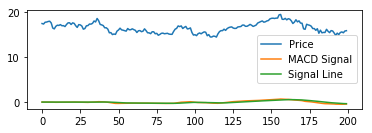

In [8]:
N = 200
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)
ax1.plot(BAC[:N], label = 'Price')
ax2.plot(MACDdf.MACD[:N], label = 'MACD Signal')
ax2.plot(MACDdf.Signal[:N], label = 'Signal Line')
plt.legend(loc = 'best')

In [72]:
MACDdf['Shares'] = 0
MACDdf.Buy[0] = 0
MACDdf.Sell[0] = 0
for i in range(1,len(MACDdf.Fast)):
    if (MACDdf.Signal[i-1] < MACDdf.MACD[i-1]) & (MACDdf.Signal[i] > MACDdf.MACD[i]):
        MACDdf.Buy[i] = 0
        MACDdf.Sell[i] = 1
        MACDdf.Shares[i] = 0
    elif (MACDdf.Signal[i-1] > MACDdf.MACD[i-1]) & (MACDdf.Signal[i] < MACDdf.MACD[i]):
        MACDdf.Sell[i] = 0
        MACDdf.Buy[i] = 1
        MACDdf.Shares[i] = 100
    else:
        MACDdf.Buy[i] = 0
        MACDdf.Sell[i] = 0
        MACDdf.Shares[i] = MACDdf.Shares[i-1]
        
MACDdf

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithC

,Buy,Sell,Fast,Slow,BAC,MACD,Signal,Shares
0,0,0,17.460000,17.460000,17.4600,0.000000,0.000000,0
1,0,0,17.402609,17.403778,17.3500,-0.001169,-0.000615,0
2,1,0,17.528615,17.524352,17.7500,0.004263,0.001185,100
3,0,0,17.602720,17.595255,17.7900,0.007465,0.003011,100
4,0,0,17.677669,17.666103,17.9200,0.011567,0.005100,100
5,0,0,17.739616,17.724400,17.9800,0.015216,0.007259,100
6,0,0,17.712283,17.702548,17.5900,0.009735,0.007734,100
7,0,1,17.504181,17.522021,16.4600,-0.017840,0.003243,0
8,0,0,17.314778,17.356926,16.2700,-0.042148,-0.004166,0
9,0,0,17.246691,17.294298,16.8400,-0.047607,-0.010836,0


In [73]:
DShares = MACDdf.Shares - MACDdf.Shares.shift(-1)
DShares[0] = 0

PandL = np.where(DShares > 0, DShares*MACDdf.BAC, np.where(DShares < 0, DShares*MACDdf.BAC, 0))
sum(PandL)

-66.99999999999977

In [92]:
Dates = pd.DataFrame(np.where(df.iloc[0:,1] == 'BAC', df.iloc[0:,0], np.NaN))
Dates.dropna(inplace = True)
Dates.reset_index(inplace = True)
Dates = Dates.iloc[0:,1]
Dates = pd.to_datetime(Dates,format='%Y%m%d')
results = pd.DataFrame()
results['Date'] = Dates
results['Buy'] = MACDdf.Buy
results['Sell'] = MACDdf.Sell
results['P&L'] = np.cumsum(PandL)
results['P&L'] = results['P&L'].shift(1)
results['P&L'][0] = 0
last = results['P&L'][len(results['P&L'])-1]
close = MACDdf.BAC[len(MACDdf.BAC)-1]
last_date = 20100821

results = results.append({'Date':pd.to_datetime(last_date,format = '%Y%m%d'),'Buy':0,'Sell':0,'P&L':last + close*100}, ignore_index = True)
results

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,Date,Buy,Sell,P&L
0,2009-08-21,0,0,0.0
1,2009-08-24,0,0,0.0
2,2009-08-25,1,0,-1735.0
3,2009-08-26,0,0,-1735.0
4,2009-08-27,0,0,-1735.0
5,2009-08-28,0,0,-1735.0
6,2009-08-31,0,0,-1735.0
7,2009-09-01,0,1,24.0
8,2009-09-02,0,0,24.0
9,2009-09-03,0,0,24.0


And so the P&L for the Moving Average Convergence/Divergence strategy is $1220.00 in one year after an initial investment of $1735.00

In [107]:
N = 14
B = 2/(N+1)
RSI = pd.DataFrame()
RSI['BAC'] = BAC
RSI['U'] = np.where(RSI.BAC.shift(-1) - RSI.BAC > 0, 1, 0)
RSI['D'] = np.where(RSI.BAC.shift(-1) - RSI.BAC < 0, 1, 0)

U_t = RSI.U.rolling(N).sum()
D_t = RSI.D.rolling(N).sum()
U_D = pd.DataFrame()

U_D['U_t'] = U_t
U_D['D_t'] = D_t
cum_U = np.cumsum(RSI.U)
cum_D = np.cumsum(RSI.D)
U_D['U_t'] = np.where(U_D.U_t.isna(), cum_U, U_D.U_t)
U_D['D_t'] = np.where(U_D.D_t.isna(), cum_D, U_D.D_t)

RStrength = pd.DataFrame()
RStrength = RStrength.append({'N_up':U_D.U_t[0],'N_down':U_D.D_t[0]}, ignore_index = True)
for i in range(1,len(U_t)-1):
    up = (1-B)*RStrength.N_up[i-1] + B*U_D.U_t[i]
    down = (1-B)*RStrength.N_down[i-1] + B*U_D.D_t[i]
    RStrength = RStrength.append({'N_up':up,'N_down':down},ignore_index = True)

RStrength['RS'] = RStrength.N_up/RStrength.N_down
RSI['RSI'] = 100*(RStrength.RS/(1+RStrength.RS))
RSI

,BAC,U,D,RSI
0,17.4600,0,1,0.000000
1,17.3500,1,0,11.764706
2,17.7500,1,0,27.652733
3,17.7900,1,0,42.238576
4,17.9200,1,0,53.855199
5,17.9800,0,1,57.682165
6,17.5900,0,1,57.527496
7,16.4600,0,1,55.461883
8,16.2700,1,0,55.486486
9,16.8400,1,0,56.623461


In [128]:
Signals = pd.DataFrame()
Signals['Buy'] = np.where(RSI.RSI < 35, 1, 0)
Signals['Sell'] = np.where(RSI.RSI > 80, 1, 0)
Signals['Shares'] = 100
Signals['Shares'] = np.where(Signals.Buy == 1, 100, np.where(Signals.Sell == 1, 0, Signals.Shares.shift(1)))
Signals

,Buy,Sell,Shares
0,1,0,100.0
1,1,0,100.0
2,1,0,100.0
3,0,0,100.0
4,0,0,100.0
5,0,0,100.0
6,0,0,100.0
7,0,0,100.0
8,0,0,100.0
9,0,0,100.0


In [129]:
DShares = Signals.Shares - Signals.Shares.shift(-1)
DShares[0] = 0

PandL = np.where(DShares > 0, DShares*MACDdf.BAC, np.where(DShares < 0, DShares*RSI.BAC, 0))
sum(PandL)

-82.0

In [130]:
RSIresults = pd.DataFrame()
RSIresults['Date'] = Dates
RSIresults['Buy'] = Signals.Buy
RSIresults['Sell'] = Signals.Sell
RSIresults['P&L'] = np.cumsum(PandL)
RSIresults['P&L'] = RSIresults['P&L'].shift(1)
RSIresults['P&L'][0] = 0
last = RSIresults['P&L'][len(RSIresults['P&L'])-1]
close = RSI.BAC[len(RSI.BAC)-1]
last_date = 20100821

RSIresults = RSIresults.append({'Date':pd.to_datetime(last_date,format = '%Y%m%d'),'Buy':0,'Sell':0,'P&L':last + close*100}, ignore_index = True)
RSIresults

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Date,Buy,Sell,P&L
0,2009-08-21,1,0,0.0
1,2009-08-24,1,0,0.0
2,2009-08-25,1,0,0.0
3,2009-08-26,0,0,0.0
4,2009-08-27,0,0,0.0
5,2009-08-28,0,0,0.0
6,2009-08-31,0,0,0.0
7,2009-09-01,0,0,0.0
8,2009-09-02,0,0,0.0
9,2009-09-03,0,0,0.0


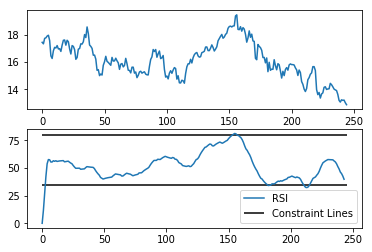

In [131]:
N = 245
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)
ax1.plot(BAC[:N], label = 'Price')
ax2.plot(RSI.RSI[:N], label = 'RSI')
ax2.hlines([35,80], xmin = 0, xmax = N, label = 'Constraint Lines')
plt.legend(loc = 'best')

Given the plot of the Relative Strength Index, I found that a long signal at 35 was more optimal than the 20 level. Although few trade signals were outputted, the short signal was well timed providing a significant profit.

In [160]:
CVXdf = pd.read_csv("CVX.csv")
XOMdf = pd.read_csv("XOM.csv")
CVXdf['CVXRet'] = np.log(CVXdf.Close) - np.log(CVXdf.Close).shift(1)
XOMdf['XOMRet'] = np.log(XOMdf.Close) - np.log(XOMdf.Close).shift(1)

y = CVXdf.CVXRet.dropna()
x = XOMdf.XOMRet.dropna()
x = sm.add_constant(x)
reg = sm.OLS(y,x).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 CVXRet   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     561.5
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           9.05e-84
Time:                        12:04:29   Log-Likelihood:                 1658.0
No. Observations:                 502   AIC:                            -3312.
Df Residuals:                     500   BIC:                            -3303.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      1.210      0.227      -0.000       0.001
XOMRet         0.8883      0.037     23.695      0.000       0.815       0.962
==============================================================================
Omnibus:                      100.822   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1203.723
Skew:                           0.462   Prob(JB):                    4.12e-262
Kurtosis:                      10.530   Cond. No.                         94.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

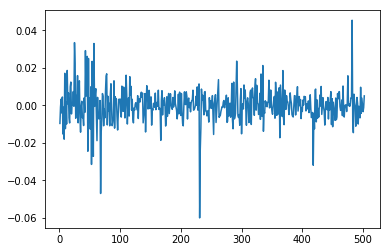

In [161]:
z_t = (reg.predict(x) - y)
plt.plot(z_t)

In [167]:
adfTest = ts.adfuller(z_t, autolag='AIC')
adfTest

(-23.883675321077348,
 0.0,
 0,
 501,
 {'1%': -3.443470002903981,
  '5%': -2.867326248740681,
  '10%': -2.569851849873108},
 -3194.1542534920454)

Since the p-value is less than 0.05, the residual is stationary

In [190]:
delta = 2*np.std(z_t)
c = reg.params.const
a = reg.params.XOMRet
pairs = pd.DataFrame()
pairs['Buy'] = np.where(((CVXdf.CVXRet.shift(1) - a*XOMdf.XOMRet.shift(1)) > (c - delta)) &
                         ((CVXdf.CVXRet - a*XOMdf.XOMRet) <= (c - delta)), 1, 0)
pairs['Sell'] = np.where(((CVXdf.CVXRet.shift(1) - a*XOMdf.XOMRet.shift(1)) < (c + delta)) &
                         ((CVXdf.CVXRet - a*XOMdf.XOMRet) >= (c + delta)), 1, 0)
pairs['SharesXOM'] = 0
for i in range(1,len(pairs.Buy)):
    if (pairs.Buy[i] == 1) & (pairs.SharesXOM[i-1] == 0):
        pairs.SharesXOM[i] = 100
    elif (pairs.Sell[i] == 1) & (pairs.SharesXOM[i-1] == 100):
        pairs.SharesXOM[i] = 0
    else:
        pairs.SharesXOM[i] = pairs.SharesXOM[i-1]

pairs['SharesCVX'] = 0
for i in range(1,len(pairs.Buy)):
    if (pairs.Buy[i] == 1) & (pairs.SharesCVX[i-1] == 0):
        pairs.SharesCVX[i] = -100
    elif (pairs.Sell[i] == 1) & (pairs.SharesCVX[i-1] == -100):
        pairs.SharesCVX[i] = 0
    else:
        pairs.SharesCVX[i] = pairs.SharesCVX[i-1]



XOMdshares = pairs.SharesXOM - pairs.SharesXOM.shift(1)
CVXdshares = pairs.SharesCVX - pairs.SharesCVX.shift(1)

XOMdshares[0] = 0
CVXdshares[0] = 0
pairs

,Buy,Sell,SharesXOM,SharesCVX
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
5,0,0,0,0
6,0,0,0,0
7,0,0,0,0
8,0,1,0,0
9,0,0,0,0


In [197]:
Profit = 0
pairs['P&L'] = 0
for i in range(1,len(pairs.Buy)):
    if XOMdshares[i] > 0:
        Profit = Profit - 100*XOMdf.Close[i] + 100*CVXdf.Close[i]
        pairs['P&L'][i] = Profit
    elif XOMdshares[i] < 0:
        Profit = Profit + 100*XOMdf.Close[i] - 100*CVXdf.Close[i]
        pairs['P&L'][i] = Profit
    else:
        pairs['P&L'][i] = Profit
        
Profit = Profit + 100*XOMdf.Close[i] - 100*CVXdf.Close[i]
pairs = pairs.append({'Buy':0, 'Sell':0, 'SharesXOM':0, 'SharesCVX':0, 'P&L':Profit}, ignore_index = True)
pairs

,Buy,Sell,SharesXOM,SharesCVX,P&L
0,0.0,0.0,0.0,0.0,0.0000
1,0.0,0.0,0.0,0.0,0.0000
2,0.0,0.0,0.0,0.0,0.0000
3,0.0,0.0,0.0,0.0,0.0000
4,0.0,0.0,0.0,0.0,0.0000
5,0.0,0.0,0.0,0.0,0.0000
6,0.0,0.0,0.0,0.0,0.0000
7,0.0,0.0,0.0,0.0,0.0000
8,0.0,1.0,0.0,0.0,0.0000
9,0.0,0.0,0.0,0.0,0.0000


In [202]:
summary = pd.DataFrame()
summary['Date'] = XOMdf.Date
summary['Long'] = pairs.Buy
summary['Short'] = pairs.Sell
summary['Return'] = pairs['P&L']

summary

,Date,Long,Short,Return
0,2015-11-30,0.0,0.0,0.0
1,2015-12-01,0.0,0.0,0.0
2,2015-12-02,0.0,0.0,0.0
3,2015-12-03,0.0,0.0,0.0
4,2015-12-04,0.0,0.0,0.0
5,2015-12-07,0.0,0.0,0.0
6,2015-12-08,0.0,0.0,0.0
7,2015-12-09,0.0,0.0,0.0
8,2015-12-10,0.0,1.0,0.0
9,2015-12-11,0.0,0.0,0.0
